In [26]:
# Import Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

%matplotlib inline

In [27]:
# Importing the data
environment_temp = pd.read_csv("https://raw.githubusercontent.com/detmanski/climate_change_analysis/main/Resources/Environment_Temperature_change.csv", encoding='latin-1')
environment_temp.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,è,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,è,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,è,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,è,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,è,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


#Dropping rows with missing values 

In [28]:
# Dropping rows with missing values 
environment_temp = environment_temp.dropna()

environment_temp = environment_temp.rename(columns={'Area':'Country'})
environment_temp = environment_temp.drop(columns=['Area Code','Months Code','Element Code','Unit'])
temp_c = environment_temp.loc[environment_temp.Months.isin(['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])]

temp_c.head()

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [29]:
# Retrieves the unique values of the "Country" column in the temp_c DataFrame
temp_c.Country.unique()

temp_c = temp_c.melt(id_vars=['Country','Months','Element'], var_name='Year', value_name='temp_c')
temp_c['Year'] = temp_c['Year'].str[1:].astype('str')
temp_c.head()

,Country,Months,Element,Year,temp_c
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature change,1961,0.516


In [30]:
# Average for the Whole World
AvgT = temp_c.loc[temp_c.Element=='Temperature change'].groupby(['Year'], as_index=False).mean()

In [31]:
# Average for Each Country
AvgTC = temp_c.loc[temp_c.Element=='Temperature change'].groupby(['Country','Year'], as_index=False).mean()

# Test-Train Split

In [33]:
# Test-Train Split
# Before we can make a prediction, we need to train our model. We will split the data into a test and train dataset. This can be used to verify the predictability of our model.

MonthV = {'January':'1', 'February':'2', 'March':'3', 'April':'4', 'May':'5', 'June':'6', 'July':'7','August':'8', 'September':'9', 'October':'10', 'November':'11', 'December':'12'}
temp_c = temp_c.replace(MonthV)

temp_c.head()

y = temp_c['temp_c'].loc[temp_c.Element=='Temperature change']
X = temp_c.drop(columns=['temp_c','Country','Months','Element']).loc[temp_c.Element=='Temperature change']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)


# Regression
One of the simplest models we can use on the system is regression. Below we use both a linear model and polynomial models to predict world the temperatures in the future.


## Simple Linear Regression
We use the test-train data to train the model and compare the predictions to actual data.

RMSE: 0.969493733851476


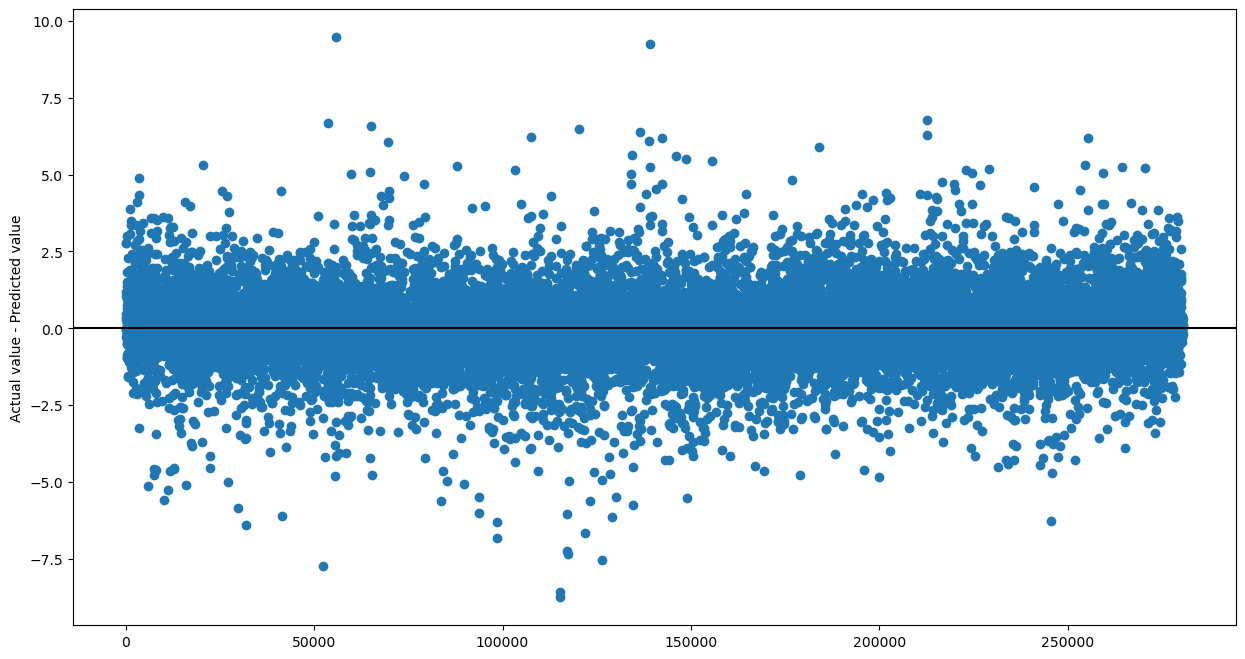

In [34]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LRpreds = LR.predict(X_valid)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, LRpreds)))

plt.figure(figsize=(15,8))
plt.plot(y_valid - LRpreds, 'o')
plt.axhline(y=0.0, color='k', linestyle='-')
plt.ylabel('Actual value - Predicted value')
plt.show()

We are happy with what the model is prediciting so we use the whole dataset to train a model.

In [ ]:
# Fit the model to the training data
LR.fit(X, y)

LinearRegression()

We now create artifical data that we can use to test what the model predicts for the future.

In [35]:
# Creating linear regression prediction data
LR_test = pd.DataFrame({'Year': np.random.randint(1980, 2060, size=1000)})
LR_test = LR_test.sort_values(by=['Year']).reset_index(drop=True).astype(str)

In [36]:
# Generate linear regression test predictions
preds_test = LR.predict(LR_test)
LR_test['temp_c'] = pd.Series(preds_test, index=LR_test.index)


## Polynomial regression
As we can clearly see that the data is not linear so we need to use Polynomial Regression model to get more accuarte results.

In [37]:
PR2_mod = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

PR3_mod = Pipeline([('poly', PolynomialFeatures(degree=5)),
                  ('linear', LinearRegression(fit_intercept=False))])
# Fit the model to the training data
PR2_mod.fit(X, y)
PR3_mod.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression(fit_intercept=False))])

In [38]:
# Creating polynomial regression prediction data
PR2_test = pd.DataFrame({'Year': np.random.randint(1980, 2060, size=1000)})
PR2_test = PR2_test.sort_values(by=['Year']).reset_index(drop=True).astype(str)

PR3_test = pd.DataFrame({'Year': np.random.randint(1980, 2060, size=1000)})
PR3_test = PR3_test.sort_values(by=['Year']).reset_index(drop=True).astype(str)

In [39]:
# Generate polynomial regression test predictions
pred2_test = PR2_mod.predict(PR2_test)
pred3_test = PR3_mod.predict(PR3_test)

PR2_test['TempC'] = pd.Series(pred2_test, index=PR2_test.index)
PR3_test['TempC'] = pd.Series(pred3_test, index=PR3_test.index)

# Plotting Results
 Linear and Polynomial Models
 

ModuleNotFoundError: No module named 'google.colab'

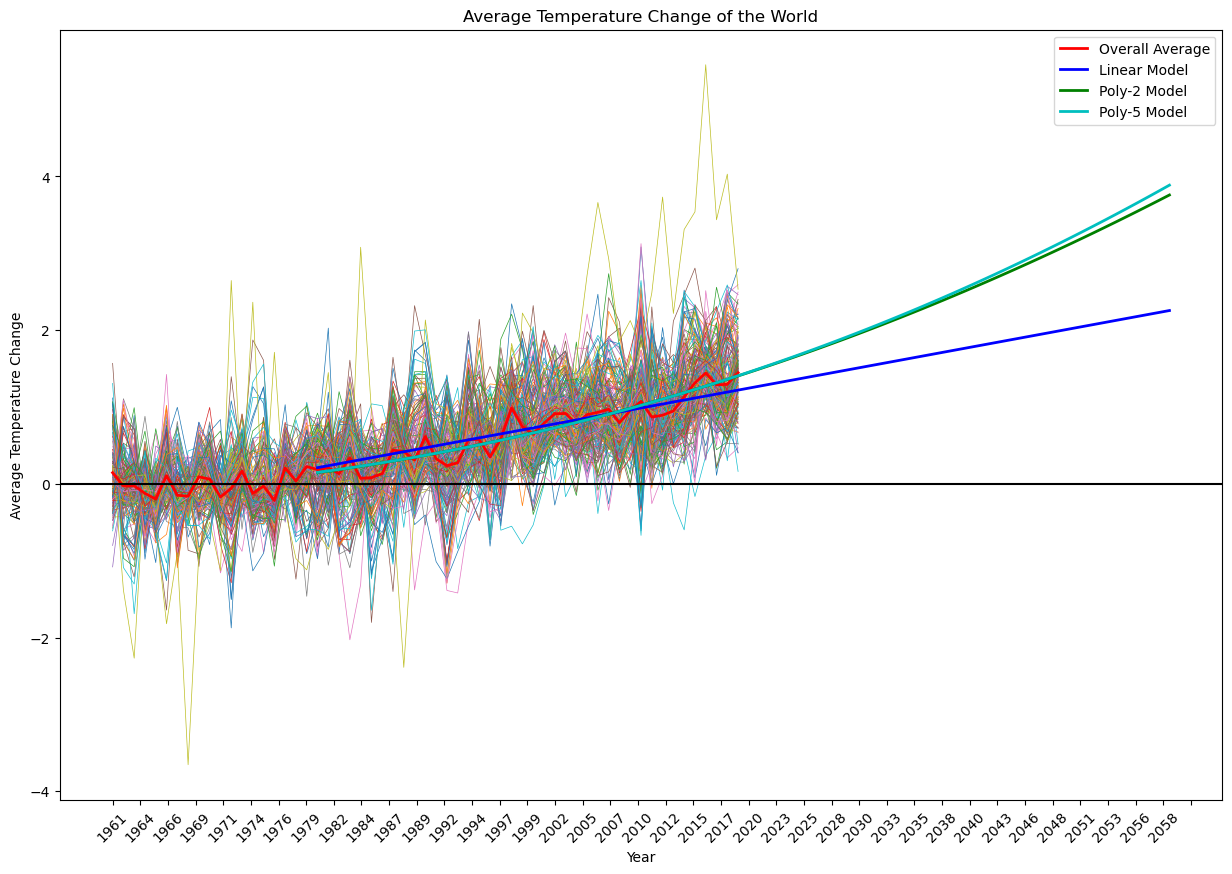

In [40]:
# Plotting Results: Linear and Polynomial Models
plt.figure(figsize=(15, 10))

# Plotting temperature change for each country
for i in AvgTC.Country.unique():
    plt.plot(AvgTC.Year.loc[AvgTC.Country == str(i)], AvgTC.temp_c.loc[AvgTC.Country == str(i)], linewidth=0.5)

# Plotting overall average temperature change
plt.plot(AvgT.Year, AvgT.temp_c, 'r', linewidth=2.0, label='Overall Average')

# Plotting linear regression model
plt.plot(LR_test.Year.unique(), LR_test.groupby('Year').mean(), 'b', linewidth=2.0, label='Linear Model')

# Plotting polynomial regression models
plt.plot(PR2_test.Year.unique(), PR2_test.groupby('Year').mean(), 'g', linewidth=2.0, label='Poly-2 Model')
plt.plot(PR3_test.Year.unique(), PR3_test.groupby('Year').mean(), 'c', linewidth=2.0, label='Poly-5 Model')

# Adding horizontal line at y=0
plt.axhline(y=0.0, color='k', linestyle='-')

plt.xticks(np.linspace(0, 100, 40), rotation=45)
plt.xlabel('Year')
plt.ylabel('Average Temperature Change')
plt.title('Average Temperature Change of the World')
plt.legend()

from google.colab import files
# Save the plot as an image file (e.g., PNG, PDF, JPG)
plt.savefig('temperature_change_plot.png')

# Download the plot file
files.download('temperature_change_plot.png')

plt.show()

In summary, the polynomial regression model predicts a higher temperature change compared to the linear model, indicating a potentially faster rate of temperature increase in the future. However, the addition of more factors did not significantly improve the model's accuracy, suggesting that the available data may not exhibit a high-order polynomial relationship. It is important to acknowledge the limitations of these simplified models in capturing all the complexities of the climate system. To address and mitigate the impacts of rising temperatures, a comprehensive approach encompassing scientific research, policy measures, and global efforts to reduce greenhouse gas emissions and adapt to climate change is crucial.